In [3]:
from pyspark import SparkConf, SparkContext
import pandas as pd

In [4]:
conf = SparkConf().setMaster("local").setAppName("uber-date-trips")
sc = SparkContext(conf=conf)

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/01/25 08:11:52 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
directory = "/home/dojm.ex5/spark-flink-kafka"
filename = "fhvhv_tripdata_2020-03.csv"

In [6]:
lines = sc.textFile(f"{directory}/{filename}")

In [14]:
header = lines.first()
filtered_lines = lines.filter(lambda row: row != header)
filtered_lines.take(1)

['HV0005,B02510,2020-03-01 00:03:40,2020-03-01 00:23:39,81,159,']

In [15]:
dates = filtered_lines.map(lambda x: x.split(",")[2].split(" ")[0])

In [16]:
result = dates.countByValue()

In [17]:
result

defaultdict(int,
            {'2020-03-01': 784246,
             '2020-03-02': 648986,
             '2020-03-03': 697880,
             '2020-03-04': 707879,
             '2020-03-05': 731165,
             '2020-03-06': 872012,
             '2020-03-07': 886071,
             '2020-03-08': 731222,
             '2020-03-09': 628940,
             '2020-03-10': 626474,
             '2020-03-11': 628601,
             '2020-03-12': 643257,
             '2020-03-13': 660914,
             '2020-03-14': 569397,
             '2020-03-15': 448125,
             '2020-03-16': 391518,
             '2020-03-17': 312298,
             '2020-03-18': 269232,
             '2020-03-19': 252773,
             '2020-03-20': 261900,
             '2020-03-21': 215745,
             '2020-03-22': 162165,
             '2020-03-23': 162392,
             '2020-03-24': 141686,
             '2020-03-25': 141088,
             '2020-03-26': 141607,
             '2020-03-27': 159339,
             '2020-03-28': 138456,
   

In [18]:
trips = pd.Series(result, name="trips")
trips

2020-03-01    784246
2020-03-02    648986
2020-03-03    697880
2020-03-04    707879
2020-03-05    731165
2020-03-06    872012
2020-03-07    886071
2020-03-08    731222
2020-03-09    628940
2020-03-10    626474
2020-03-11    628601
2020-03-12    643257
2020-03-13    660914
2020-03-14    569397
2020-03-15    448125
2020-03-16    391518
2020-03-17    312298
2020-03-18    269232
2020-03-19    252773
2020-03-20    261900
2020-03-21    215745
2020-03-22    162165
2020-03-23    162392
2020-03-24    141686
2020-03-25    141088
2020-03-26    141607
2020-03-27    159339
2020-03-28    138456
2020-03-29    115393
2020-03-30    132593
2020-03-31    129550
Name: trips, dtype: int64

<AxesSubplot:>

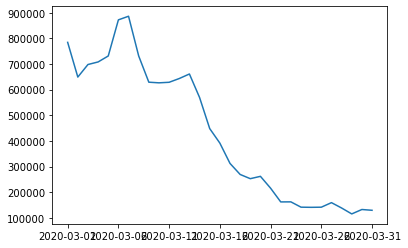

In [19]:
import matplotlib.pyplot as plt

trips.plot()